In [31]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
az.style.use('arviz-darkgrid')

In [4]:
N = 100
β0 = 21
β1 = 8

In [5]:
x = stats.norm(50, 1).rvs(N)
ϵ = stats.norm(0, 2.5).rvs(N)
y = β0 +  (β1 * x) + ϵ

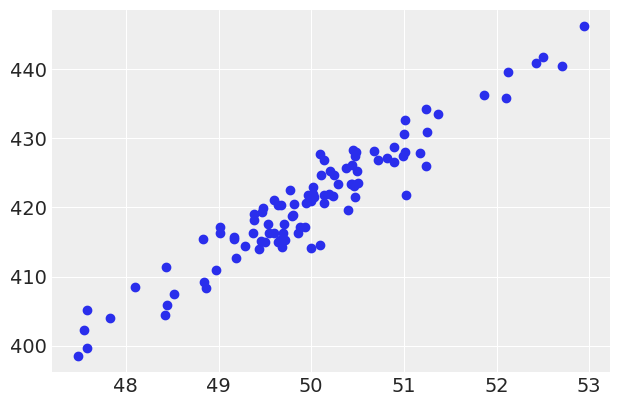

In [6]:
plt.scatter(x, y);

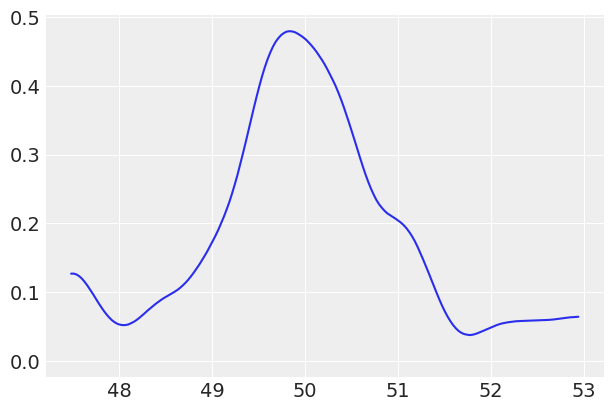

In [10]:
az.plot_kde(x);

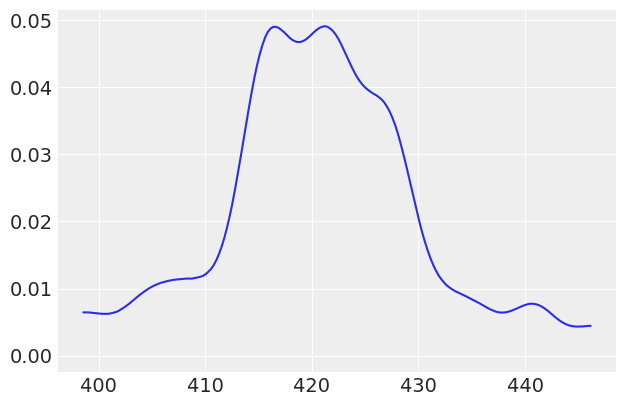

In [7]:
az.plot_kde(y);

In [8]:
with pm.Model() as model:
    β0h = pm.Normal('β0', mu=0, sd=50)
    β1h = pm.Normal('β1', mu=0, sd=50)
    ϵh = pm.HalfNormal('ϵ', 10)
    μh = pm.Deterministic('μ', β0h + β1h * x)
    yh = pm.Normal('y_hat', mu=μh, sd=ϵh, observed=y)
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β1, β0]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:27<00:00, 181.72draws/s]
The acceptance probability does not match the target. It is 0.8956613029545092, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8842828420667969, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


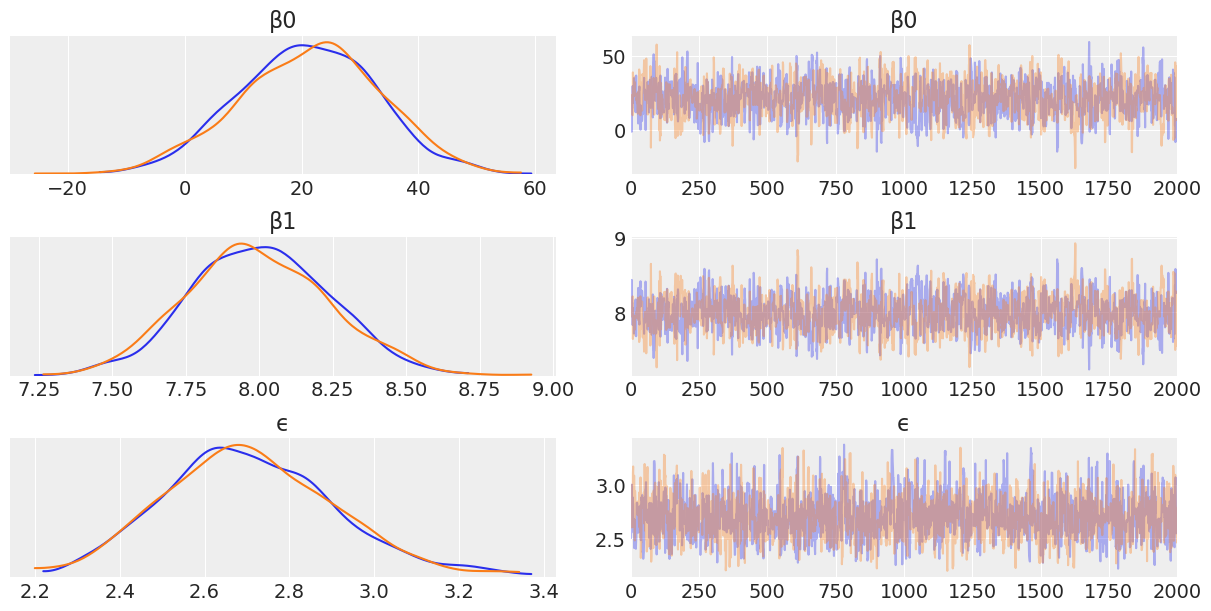

In [9]:
az.plot_trace(trace, var_names=['β0', 'β1', 'ϵ']);

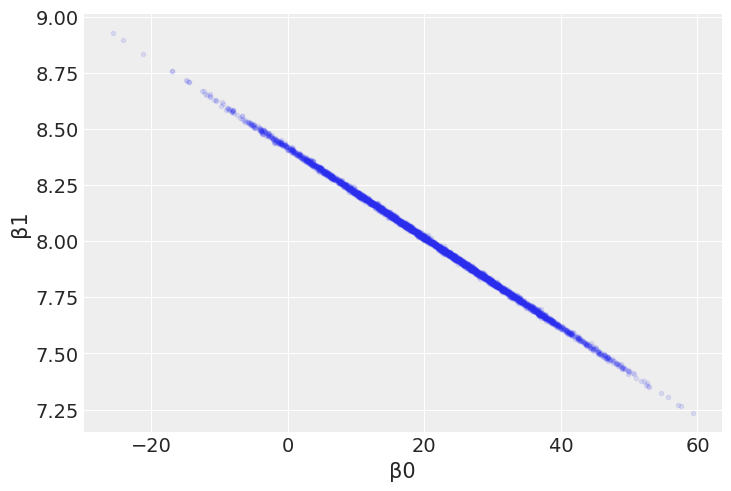

In [12]:
az.plot_pair(trace, var_names=['β0', 'β1'], plot_kwargs={'alpha': 0.1});

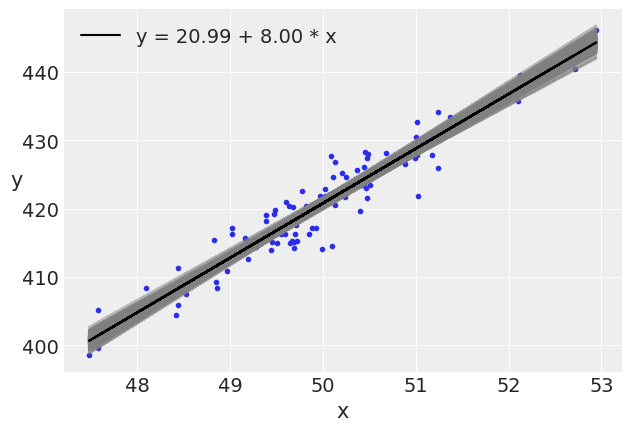

In [35]:
plt.plot(x, y, 'C0.')

alpha_m = trace['β0'].mean()
beta_m = trace['β1'].mean()

draws = range(0, len(trace['β0']), 10)
plt.plot(x, trace['β0'][draws] + trace['β1'][draws]
         * x[:, np.newaxis], c='gray', alpha=0.5)

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

In [33]:
m = LinearRegression().fit(x.reshape(100,1),y)
m.intercept_, m.coef_

(22.743623522339476, array([7.9610853]))

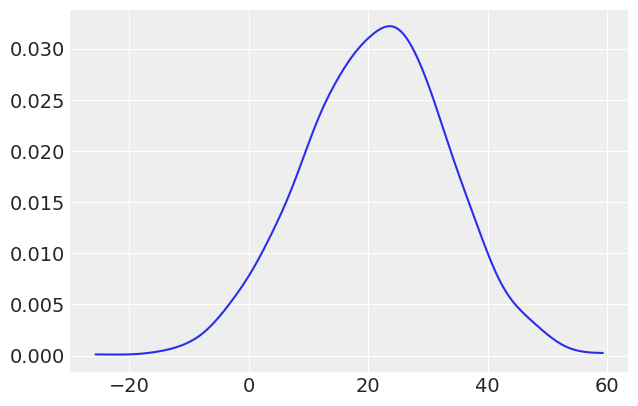

In [40]:
az.plot_kde(trace['β0']);

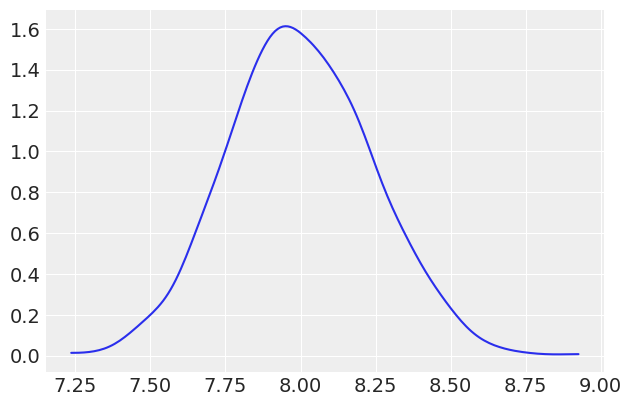

In [41]:
az.plot_kde(trace['β1']);

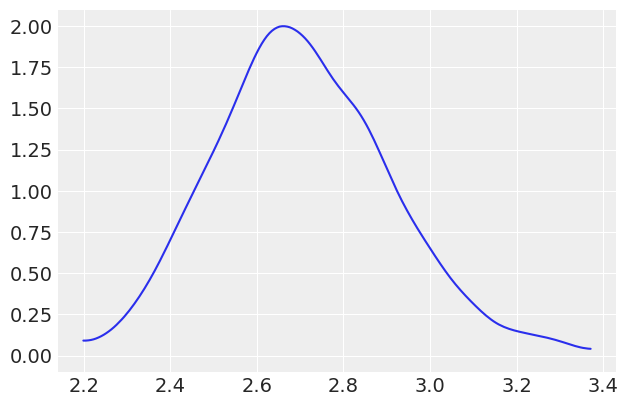

In [42]:
az.plot_kde(trace['ϵ']);

In [43]:
ppc = pm.sample_posterior_predictive(trace, samples=2000, model=model)

100%|██████████| 2000/2000 [00:01<00:00, 1838.48it/s]


In [44]:
az.r2_score(y, ppc['y_hat'])

r2        0.908677
r2_std    0.003113
dtype: float64